In [2]:
import pandas as pd 

training = pd.read_csv('../Data/training.csv', usecols=["emotion", "image"," pixels"])
validation = pd.read_csv('../Data/validation.csv', usecols=["emotion", "image"," pixels"])
test = pd.read_csv('../Data/test.csv', usecols=["emotion", "image"," pixels"])

In [3]:
import numpy as np
from matplotlib import image
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2

"""
Transforms the imgs in the training/testing/validation dataset and saves them as npy

Arguments:
dataset: 'train', 'test', or 'validate'
num_imgs: number of imgs/pixels in the csv dataset

"""

def resize_and_flip(dataset, num_imgs):
    hog_features = []
    emotion_classes = []
    
    if dataset=='test':
        df = test
    elif dataset=='validate':
        df = validation
    elif dataset=='train':
        df = training
    else:
        print("ERR: dataset input is incorrect")
        return
    
    for i in range(0, num_imgs):
        img_pixels = df.iloc[i][" pixels"]
        
        # if images are jpg 
        if type(img_pixels) is float:
            imgpath = '../Data/MuxspaceDataset/images/'
            img_pixels = image.imread(imgpath + str(df.iloc[i]["image"]))   # load image as pixel array
            img_data = cv2.resize(img_pixels, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
            img_data_flipped = np.fliplr(img_data)
           
        # if images are pixels
        else:
            img_pixels = df.iloc[i][" pixels"]
            img_string = img_pixels.split(' ')
            img_data = np.asarray(img_string, dtype=np.uint8).reshape(48, 48)
            img_data_flipped = np.fliplr(img_data)
        
        features, hog_img = hog(img_data, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        hog_features.append(features)
        emotion_classes.append(df.iloc[i]["emotion"])
        
        features, hog_img = hog(img_data_flipped, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        hog_features.append(features)
        emotion_classes.append(df.iloc[i]["emotion"])
    
    master_path = './ProcessedData/' + str(dataset)
    np.save(master_path + '/hog_features.npy', hog_features)
    np.save(master_path + '/emotion_classes.npy', emotion_classes)

In [4]:
resize_and_flip(dataset='train', num_imgs=3696)
resize_and_flip(dataset='validate', num_imgs=791)
resize_and_flip(dataset='test', num_imgs=798)

(72,)


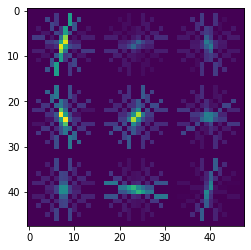

In [5]:
from PIL import Image

imgpath = '../Data/MuxspaceDataset/images/'
img_pixels = image.imread(imgpath + str(training.iloc[3695]["image"]))   # load image as pixel array
img_data = cv2.resize(img_pixels, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
img_data_flipped = np.fliplr(img_data)

Image.fromarray(img_data)

features, hog_img = hog(img_data, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_img)
print(features.shape)

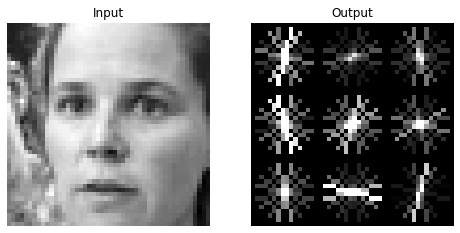

Number of features: (72,)


In [11]:
import matplotlib.pyplot as plt
from skimage import data, exposure

image = Image.fromarray(img_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input')

hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Output')
plt.show()
print("Number of features:", features.shape)

(72,)


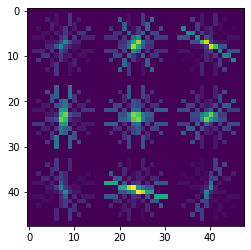

In [9]:
img_pixels = training.iloc[0][" pixels"]
img_string = img_pixels.split(' ')
img_data = np.asarray(img_string, dtype=np.uint8).reshape(48, 48)
img_data_flipped = np.fliplr(img_data)

Image.fromarray(img_data)

features, hog_img = hog(img_data, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
plt.imshow(hog_img)
print(features.shape)